# **Aprendizado de Máquina Supervisionado**

### Nome: Alexandre dos Santos Gualberto 
### RA: 790843
### Curso: Engenharia de Computação

## **Car Evaluation Data Set** 
### link: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation
#### Foi utilizado o arquivo 'car.data', posteriormente renomeado para 'car.csv'

### Atributos:
  #### buying 
  ##### Descrição: Preço pago na compra do carro
  ##### Possíveis Valores = [vhigh, high, med, low] (muito alto, alto, mediano, baixo)
  #### maint
  ##### Descrição: Preço pago com manutenção do carro
  ##### Possíveis Valores = [vhigh, high, med, low] (muito alto, alto, mediano, baixo)
  #### doors 
  ##### Descrição: Número de portas do carro
  ##### Possíveis Valores = [2, 3, 4, 5more] (duas, três, quatro, 5 ou mais)
  #### persons
  ##### Descrição: Número de pessoas que o carro suporta transportar
  ##### Possíveis Valores = [2, 4, more] (duas, quantro, mais)
  #### lug_boot
  ##### Descrição: Tamanho do Porta-malas
  ##### Possíveis Valores = [small, med, big] (pequeno, mediano, grande)
  #### safety
  ##### Descrição: Segurança do carro
  ##### Possíveis Valores = [low, med, high] (baixa, mediana, alta)

### Classes:
  #### car_acc
  ##### Descrição: Quantifica o quão aceitável é o carro com base nos atributos fornecido acima
  ##### Possíveis Valores = [unacc, acc, good, vgood] (inaceitável, aceitável, bom, muito bom)

In [ ]:
import pandas as pd
import sklearn

In [ ]:
dados = pd.read_csv('car.csv') # lê o arquivo com os dados 

In [ ]:
dados.head() # representação do DataFrame

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
dados.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "car_acc"] # Coloca os labels corretos no DataFrame

In [ ]:
dados # representação do DataFrame com os labels corretos 


,buying,maint,doors,persons,lug_boot,safety,car_acc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Transforma atributos categóricos em nominais ordinários
X = dados
oe = OrdinalEncoder(categories = [['low', 'med', 'high', 'vhigh'], ['low', 'med', 'high', 'vhigh'], ['2', '3', '4', '5more'],['2', '4', 'more'], ['small', 'med', 'big'],
                                                         ['low', 'med', 'high'], ['unacc', 'acc', 'good', 'vgood']])
matriz_dados_transformados = oe.fit_transform(X[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car_acc']])

#### Antes da transformação                     
##### buying = [low, med, high, vhigh]
##### maint = [low, med, high, vhigh]
##### doors = [2, 3, 4, 5more]
##### persons = [2, 4, more]
##### lug_boot = [small, med, big]
##### safety = [low, med, high]
##### car_acc = [unacc, acc, good, vgood]

#### Depois da transformação                     
##### buying = [0, 1, 2, 3]
##### maint = [0, 1, 2, 3]
##### doors = [0, 1, 2, 3]
##### persons = [0, 1, 2]
##### lug_boot = [0, 1, 2]
##### safety = [0, 1, 2]
##### car_acc = [0, 1, 2, 3]

In [ ]:
matriz_dados_transformados # Representação da matriz de dados após a transformação

array([[3., 3., 0., ..., 0., 1., 0.],
       [3., 3., 0., ..., 0., 2., 0.],
       [3., 3., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 3., ..., 2., 0., 0.],
       [0., 0., 3., ..., 2., 1., 2.],
       [0., 0., 3., ..., 2., 2., 3.]])

In [ ]:
# Criação de um DataFrame com os dados transformados
dados_transformados = pd.DataFrame(data = matriz_dados_transformados)
dados_transformados.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "car_acc"]
dados_transformados

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,3.0,3.0,0.0,0.0,0.0,1.0,0.0
1,3.0,3.0,0.0,0.0,0.0,2.0,0.0
2,3.0,3.0,0.0,0.0,1.0,0.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0,0.0
4,3.0,3.0,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...
1722,0.0,0.0,3.0,2.0,1.0,1.0,2.0
1723,0.0,0.0,3.0,2.0,1.0,2.0,3.0
1724,0.0,0.0,3.0,2.0,2.0,0.0,0.0
1725,0.0,0.0,3.0,2.0,2.0,1.0,2.0


In [ ]:
# Cria o vetor de classes a partir da coluna 'car_acc'
vetor_de_classes = dados_transformados['car_acc'].to_list()
print(vetor_de_classes)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
# Cria um DataFrame auxiliar que é o dados_transformados sem a coluna 'car_acc'
dados_transformados_aux = dados_transformados[["buying", "maint", "doors", "persons", "lug_boot", "safety"]]
dados_transformados_aux

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,0.0,1.0
1,3.0,3.0,0.0,0.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...
1722,0.0,0.0,3.0,2.0,1.0,1.0
1723,0.0,0.0,3.0,2.0,1.0,2.0
1724,0.0,0.0,3.0,2.0,2.0,0.0
1725,0.0,0.0,3.0,2.0,2.0,1.0


In [ ]:
# Gera a matriz de atributos a partir dos dados do DataFrame auxiliar
matriz_de_atributos = dados_transformados_aux.values
matriz_de_atributos

array([[3., 3., 0., 0., 0., 1.],
       [3., 3., 0., 0., 0., 2.],
       [3., 3., 0., 0., 1., 0.],
       ...,
       [0., 0., 3., 2., 2., 0.],
       [0., 0., 3., 2., 2., 1.],
       [0., 0., 3., 2., 2., 2.]])

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
# Realiza a partição do conjunto de teste (tam = 1295) e de treino (tam = 432)
atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(matriz_de_atributos, vetor_de_classes, test_size = 432)

In [ ]:
print(atributos_treino)

[[2. 2. 0. 1. 0. 0.]
 [2. 3. 0. 2. 2. 0.]
 [1. 3. 2. 1. 1. 1.]
 ...
 [3. 0. 3. 1. 1. 0.]
 [3. 0. 3. 0. 2. 2.]
 [0. 2. 2. 2. 1. 0.]]


In [ ]:
print(atributos_teste)

[[3. 2. 1. 0. 0. 1.]
 [1. 1. 1. 0. 1. 0.]
 [3. 3. 1. 1. 2. 0.]
 ...
 [3. 1. 3. 2. 0. 1.]
 [3. 3. 2. 2. 1. 0.]
 [1. 1. 2. 0. 2. 2.]]


In [ ]:
print(classes_treino)

[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,

In [ ]:
print(classes_teste)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [ ]:
# Gera a arvore de decisão
arvore_decisao = DecisionTreeClassifier(criterion="entropy")
arvore_decisao = arvore_decisao.fit(atributos_treino, classes_treino)

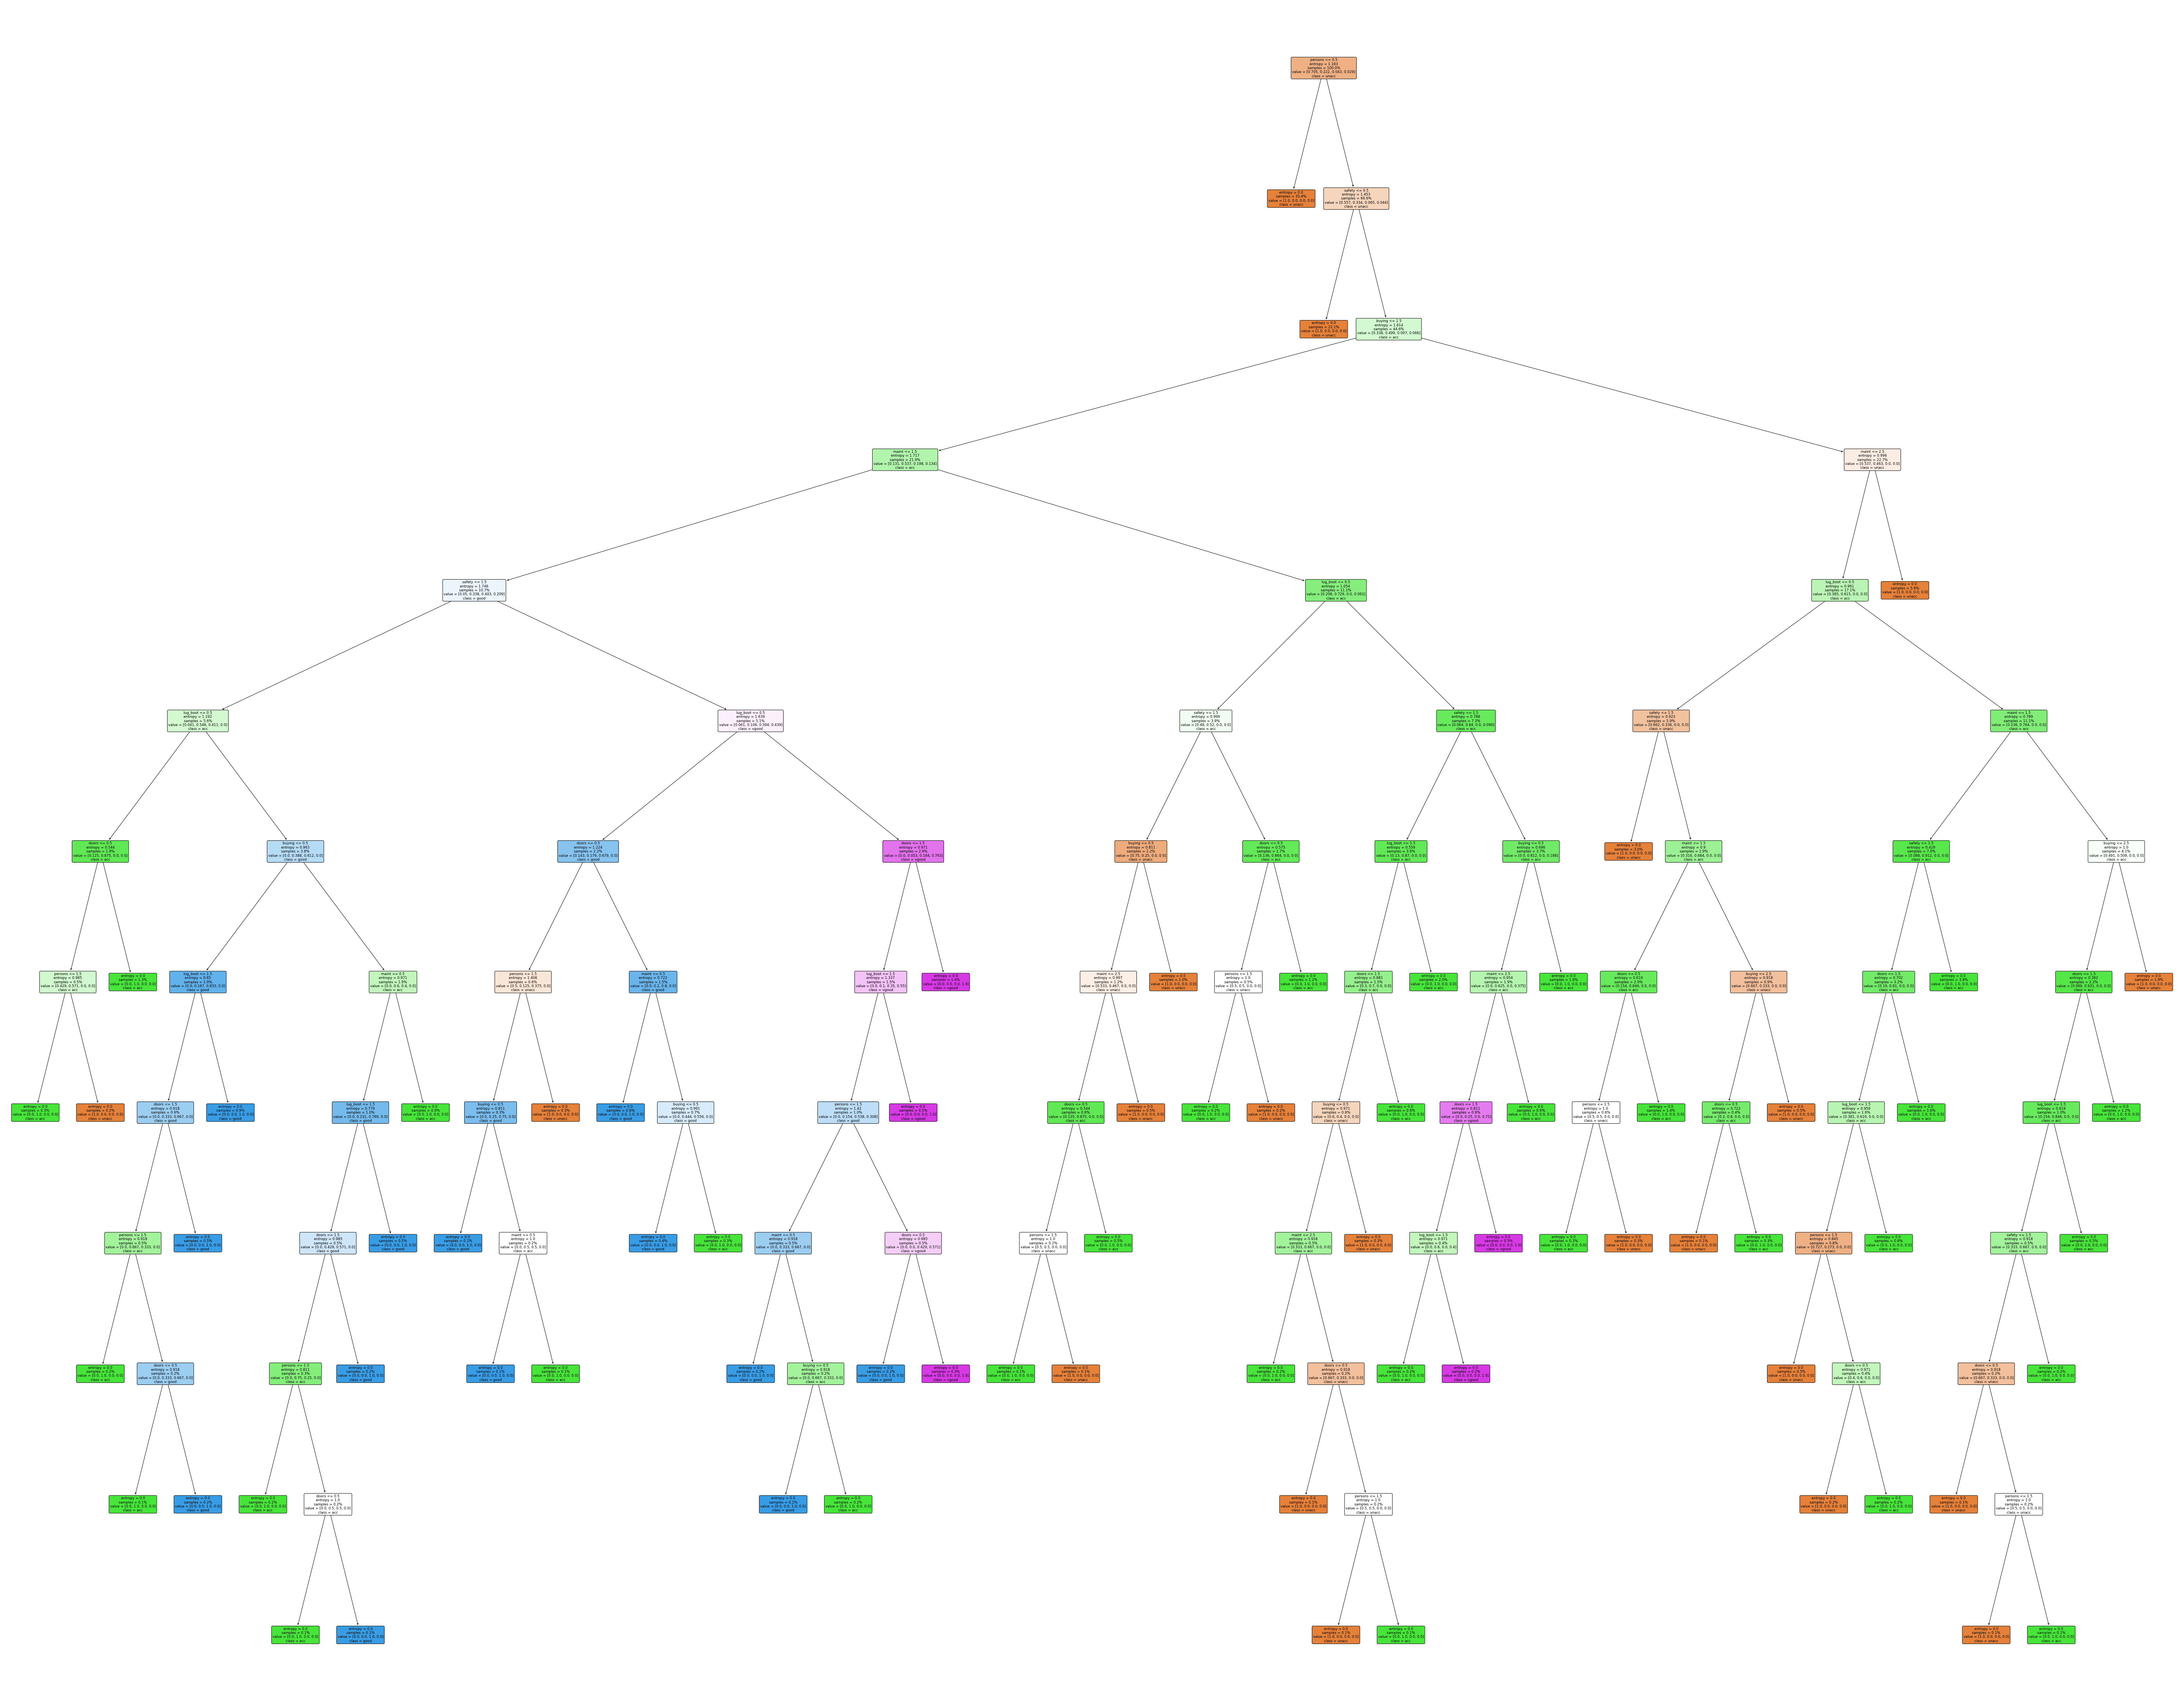

In [ ]:
# Gera a figura da arvore 
plt.figure(figsize = (100,80)) # configura o tamanho da imagem para facilitar a vizulização clique na imagem no notebook para dar zoom
atributos = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
classes = ['unacc', 'acc', 'good', 'vgood']
tree.plot_tree(arvore_decisao,
               feature_names = atributos,
               class_names = classes,
               rounded = True,
               filled = True,
               proportion = True);

In [ ]:
# Gera as previsões com base nos dados do conjunto de teste 
classes_previsao = arvore_decisao.predict(atributos_teste)
print(classes_previsao)

[0. 0. 0. 0. 0. 0. 0. 3. 0. 3. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 3. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 2. 0. 2. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 0. 0. 0. 0. 3. 0.
 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 3. 0. 3. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 1. 1. 1. 0. 3. 3. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 3. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 3. 0. 1. 2. 3. 1. 0. 0. 0. 0. 0. 0. 3. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.

In [ ]:

print(classes_teste) # mostra o resultado real do conjunto de testes 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

In [ ]:
# Mostra na tela a classe real seguido da classe predita 
# Usado para melhor visualizar a matriz de confusão 
for i in range(len(classes_teste)):
  if(classes_teste[i] != arvore_decisao.predict(atributos_teste)[i]):
    print(classes_teste[i], arvore_decisao.predict(atributos_teste)[i])

1.0 0.0
1.0 0.0
1.0 0.0
3.0 1.0
1.0 2.0


In [ ]:
# Gera a diagonal da matriz de confusão
diagonal = [0,0,0,0]
for i in range(len(classes_teste)):
  if(classes_teste[i] == arvore_decisao.predict(atributos_teste)[i]):
    if(classes_teste[i] == 0):
      diagonal[0] = diagonal[0] + 1
    if(classes_teste[i] == 1):
      diagonal[1] = diagonal[1] + 1
    if(classes_teste[i] == 2):
      diagonal[2] = diagonal[2] + 1
    if(classes_teste[i] == 3):
      diagonal[3] = diagonal[3] + 1

print(diagonal)

[296, 92, 13, 26]


### **Avaliação do modelo gerado**

Matriz de Confusão

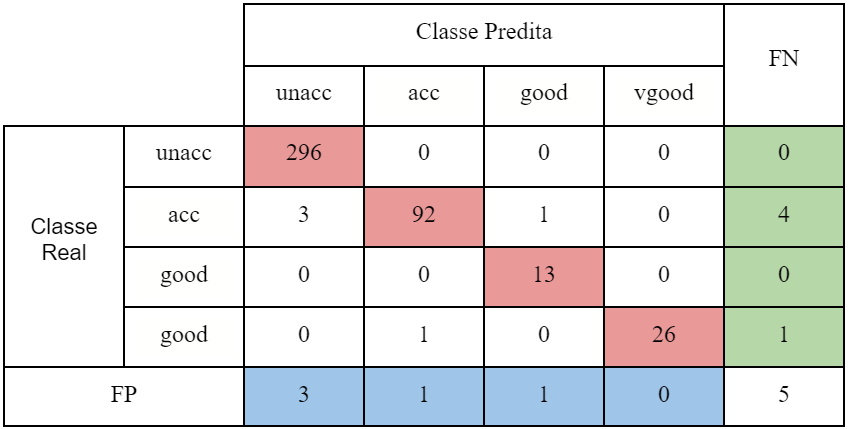

Acurácia 

In [ ]:
Acuracia_unacc = (296 + 131) / 432
Acuracia_unacc

0.9884259259259259

In [ ]:
Acuracia_acc = (92 + 335) / 432
Acuracia_acc

0.9884259259259259

In [ ]:
Acuracia_good = (13 + 414) / 432
Acuracia_good

0.9884259259259259

In [ ]:
Acuracia_vgood = (26 + 401) / 432
Acuracia_vgood

0.9884259259259259

In [ ]:
Acuracia_geral = (Acuracia_unacc + Acuracia_acc + Acuracia_good + Acuracia_vgood) / 4
Acuracia_geral

0.9814814814814815

Precisão

In [ ]:
Precisao_unacc = 296 / (296 + 3)
Precisao_unacc

0.9899665551839465

In [ ]:
Precisao_acc = 92 / (92 + 1)
Precisao_acc

0.989247311827957

In [ ]:
Precisao_good = 13 / (13 + 1)
Precisao_good

0.9285714285714286

In [ ]:
Precisao_vgood = 26 / (26 + 0)
Precisao_vgood

1.0

In [ ]:
Precisao_geral = (Precisao_unacc + Precisao_acc + Precisao_good + Precisao_vgood) / 4
Precisao_geral

0.976946323895833

Revocação

In [ ]:
Revocacao_unacc = 296 / (296 + 0)
Revocacao_unacc

1.0

In [ ]:
Revocacao_acc = 92 / (92 + 4)
Revocacao_acc

0.9583333333333334

In [ ]:
Revocacao_good = 13 / (13 + 0)
Revocacao_good

1.0

In [ ]:
Revocacao_vgood = 26 / (26 + 1)
Revocacao_vgood

0.9629629629629629

In [ ]:
Revocacao_geral = (Revocacao_unacc + Revocacao_acc + Revocacao_good + Revocacao_vgood) / 4
Revocacao_geral

0.9803240740740741

Medida-F

In [ ]:
MedidaF_unacc = 2*((Revocacao_unacc*Precisao_unacc)/(Revocacao_unacc+Precisao_unacc))
MedidaF_unacc

0.9949579831932773

In [ ]:
MedidaF_acc = 2*((Revocacao_acc*Precisao_acc)/(Revocacao_acc+Precisao_acc))
MedidaF_acc

0.9735449735449735

In [ ]:
MedidaF_good = 2*((Revocacao_good*Precisao_good)/(Revocacao_good+Precisao_good))
MedidaF_good

0.962962962962963

In [ ]:
MedidaF_vgood = 2*((Revocacao_vgood*Precisao_vgood)/(Revocacao_vgood+Precisao_vgood))
MedidaF_vgood

0.9811320754716981

In [ ]:
MedidaF_geral = (MedidaF_unacc + MedidaF_acc + MedidaF_good + MedidaF_vgood) / 4
MedidaF_geral

0.978149498793228